In [6]:
!pip install tensorflow

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import PIL
import os
import matplotlib.pyplot as plt
import tensorflow as tf


In [7]:
train_dataset = ImageDataGenerator(rescale = 1/255).flow_from_directory("SoilDataset/Train",
                                           target_size = (200, 200),
                                           batch_size = 32,
                                           class_mode = "categorical",
                                           shuffle = True
                                         )
validation_dataset = ImageDataGenerator(rescale = 1/255).flow_from_directory("SoilDataset/Validation",
                                           target_size = (200, 200),
                                           batch_size = 32,
                                           class_mode = "categorical",
                                           shuffle = True
                                         )

Found 582 images belonging to 4 classes.
Found 254 images belonging to 4 classes.


In [8]:
train_dataset.class_indices

{'Alluvial_Soil': 0, 'Black_Soil': 1, 'Clay_Soil': 2, 'Red_Soil': 3}

In [9]:
model = tf.keras.models.Sequential([
            
            # Note the input shape is the desired size of the image 200x200 with 3 bytes color
            #This is the first convolution layer with 16 filters and size of convulation filter is 3 x 3
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
        
            # The second convolution 
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            
            # The third convolution
            tf.keras.layers.Conv2D(64, (7,7), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
                  
    
            #The fourth convolution
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            
            #The fifth convolution
            tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
        
            # Flatten the results to feed into it
            tf.keras.layers.Flatten(),
            
            tf.keras.layers.Dense(128, activation='relu'),
            
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
             
    
            tf.keras.layers.Dense(4, activation='softmax') ])

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
history = model.fit(train_dataset,
                    epochs=50,
                    verbose=0,
                    validation_data = validation_dataset,
                    )

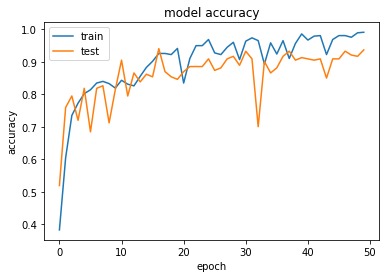

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
model.save("Model_cnn.h5")